### PROGRAM 09: NON-PARAMETRIC LOCALLY WEIGHTED REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tou = 0.5 # Bandwidth parameter

In [4]:
# Training data
X_train = np.arange(3, 33).reshape(-1, 1)
y_train = np.array([1,2,1,2,1,1,3,4,5,4,5,6,
                    5,6,7,8,9,10,11,11,12,11,
                    11,10,12,11,11,10,9,8])

In [5]:
X_train[:10]

array([[ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [6]:
y_train

array([ 1,  2,  1,  2,  1,  1,  3,  4,  5,  4,  5,  6,  5,  6,  7,  8,  9,
       10, 11, 11, 12, 11, 11, 10, 12, 11, 11, 10,  9,  8])

In [7]:
X_train.shape, y_train.shape

((30, 1), (30,))

In [8]:
# Test data
X_test = np.array([i/10 for i in range(400)]).reshape(-1, 1)
y_test = []
X_test[:10]

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9]])

In [9]:
X_test.shape

(400, 1)

In [10]:
for r in range(len(X_test)):
    weights = np.exp(-np.sum((X_train-X_test[r])**2, axis=1)/ (2 * tou**2))
    W = np.diag(weights)
    factor1 = np.linalg.inv(X_train.T.dot(W).dot(X_train)) # (X^T * W * X)^-1
    
    # factor1 * (X^T * W * Y) => (X^T * W * X)^-1 * (X^T * W * Y)
    parameter_theta = factor1.dot(X_train.T).dot(W).dot(y_train)
    
    prediction = np.dot(X_test[r], parameter_theta) # (x * parameter_theta^T)
    y_test.append(prediction)

In [11]:
y_test[:10]

[0.0,
 0.03333337008866101,
 0.06666677633155739,
 0.10000024540078646,
 0.13333382145874526,
 0.16666757691027792,
 0.20000162949981357,
 0.23333616939305601,
 0.2666715019268994,
 0.3000081148841145]

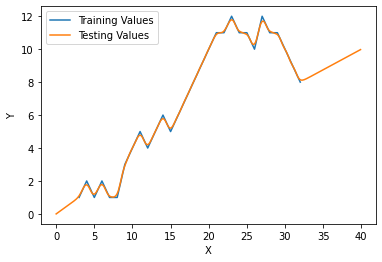

In [12]:
y_test = np.array(y_test)

line1, = plt.plot(X_train, y_train, '-')
line1.set_label("Training Values")

line2, = plt.plot(X_test, y_test, '-')
line2.set_label("Testing Values")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()